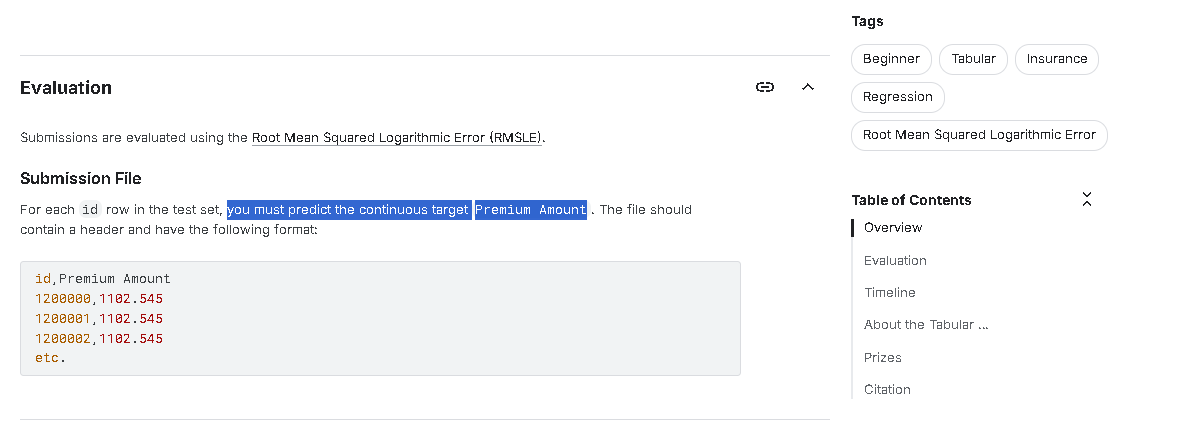

# Librerias

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

In [8]:
train = pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv", index_col = "id")
test = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv", index_col = "id")

In [9]:
display(train.info())
display(train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-null 

None

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


# Naive Base line - Median

## RMSLE

In [10]:
# Crear un array de predicciones ingenuas, todas iguales a la media
naive_predictions = np.full_like(train["Premium Amount"], train["Premium Amount"].median())

# Calcular el RMLSE
rmsle_naive = np.sqrt(mean_squared_log_error(train["Premium Amount"], naive_predictions))

print("RMLSE de la línea base ingenua:", rmsle_naive)

# 2. Registrar los resultados en una lista para compararlos posteriormente
rmsle_results = {"Naive Baseline": rmsle_naive}

RMLSE de la línea base ingenua: 1.1101942959324897


## MAPE

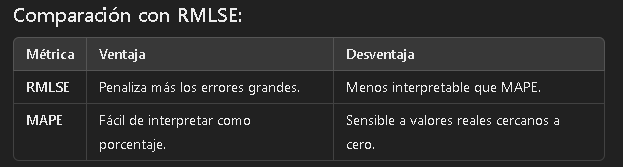

significa que, en promedio, el valor absoluto de las predicciones difiere del valor real en un 237% del valor real!

In [11]:
# Calcular el RMLSE
mape_naive = mean_absolute_percentage_error(train["Premium Amount"], naive_predictions)

print("MAPE de la línea base ingenua:", mape_naive*100,"%")

# Registrar los resultados en un diccionario para comparación
mape_results = {"Naive Baseline": mape_naive}

MAPE de la línea base ingenua: 237.18462069659597 %


----

# 

# Target Analisis

Correlación de Pearson entre las variables predictoras y la variable objetivo:
Age                    -0.002430
Annual Income          -0.012390
Number of Dependents   -0.000976
Health Score            0.014704
Previous Claims         0.046874
Vehicle Age             0.000391
Credit Score           -0.026014
Insurance Duration     -0.000028
Premium Amount          1.000000
Name: Premium Amount, dtype: float64


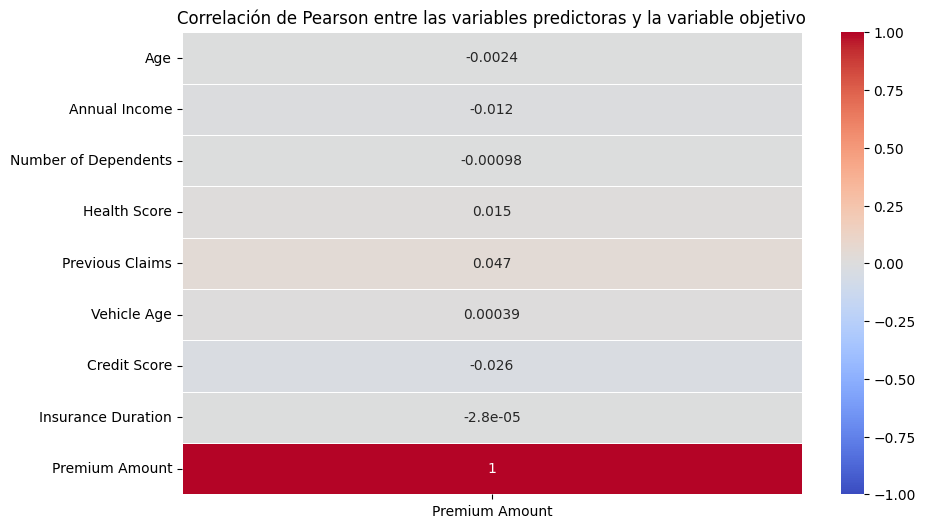

In [12]:
num_cols = [col for col in train.columns if train[col].dtype != 'O']
# Asegúrate de incluir la columna 'Premium Amount' si no está en num_cols

# Ahora calcula la matriz de correlación
correlation_matrix = train[num_cols].corr()

# Mostrar la correlación de Pearson entre las variables predictoras y la variable objetivo
print("Correlación de Pearson entre las variables predictoras y la variable objetivo:")
print(correlation_matrix["Premium Amount"])

# Visualización de la correlación con la variable objetivo
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[["Premium Amount"]], annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlación de Pearson entre las variables predictoras y la variable objetivo")
plt.show()


In [13]:
print("faltantes% ? : ", train["Premium Amount"].isnull().mean())
y = train.pop("Premium Amount")

faltantes% ? :  0.0


/tmp/ipykernel_24/3478875657.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


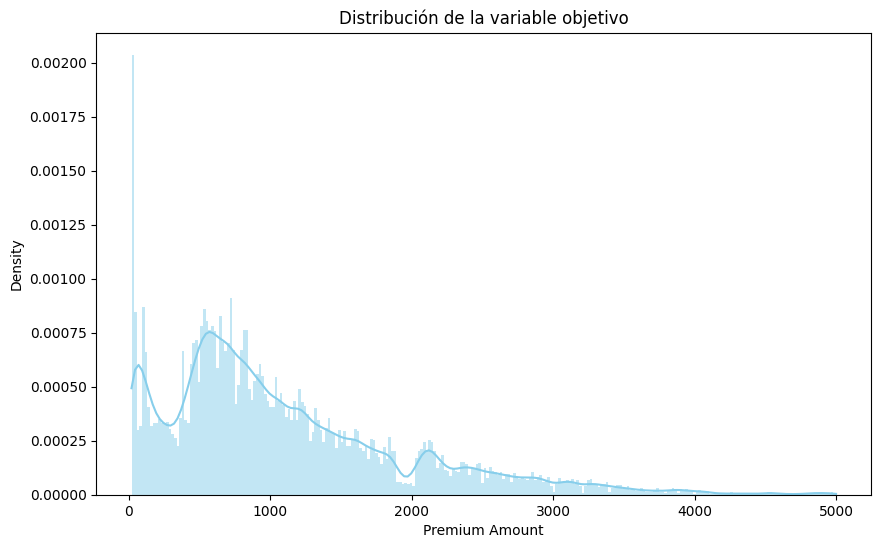

<Figure size 1000x600 with 0 Axes>

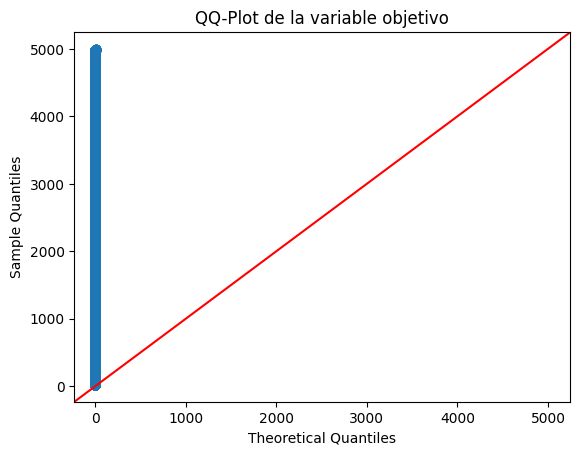

In [14]:
with pd.option_context('mode.use_inf_as_na', True):
    # Visualizar la distribución
    plt.figure(figsize=(10, 6))
    
    sns.histplot(y, kde=True, color="skyblue", stat="density", linewidth=0)
    
    plt.title("Distribución de la variable objetivo")
    plt.show()

    # QQ plot
    plt.figure(figsize=(10, 6))
    
    sm.qqplot(y, line='45')
    plt.title("QQ-Plot de la variable objetivo")
    plt.show()


In [15]:
features = test.columns.to_list()
train = train[features]
full = pd.concat([train,test], axis = 0)
# Eliminar duplicados y resetear el índice
full = full.drop_duplicates().reset_index(drop=True)

In [16]:
# tamaños 
train_size = train.shape[0]
test_size = test.shape[0]# tamaños 
print(full.shape)
full.tail()

(2000000, 19)


,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
1999998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo
1999999,25.0,Male,24843.0,Divorced,3.0,High School,NaN,24.893939,Suburban,Comprehensive,NaN,15.0,NaN,8.0,2021-05-18 15:21:39.108562,Good,No,Rarely,House


In [21]:
# porcentaje total de valores faltantes (%)
full.drop("Policy Start Date", axis = 1, inplace = True)
full.isnull().mean()*100

Age                      1.55970
Gender                   0.00000
Annual Income            3.74045
Marital Status           1.54325
Number of Dependents     9.14010
Education Level          0.00000
Occupation              29.86000
Health Score             6.17625
Location                 0.00000
Policy Type              0.00000
Previous Claims         30.34155
Vehicle Age              0.00045
Credit Score            11.46665
Insurance Duration       0.00015
Customer Feedback        6.50500
Smoking Status           0.00000
Exercise Frequency       0.00000
Property Type            0.00000
dtype: float64

-----


# Modeling

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd

# Identificar las columnas numéricas y categóricas
num_features = [col for col in full.columns if full[col].dtype != 'O']
cat_features = [col for col in full.columns if full[col].dtype == 'O']

# Pipeline para las características numéricas
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputación con la mediana
    ('MinMaxScaler', MinMaxScaler())
])

# Pipeline para las características categóricas
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('OneHotEncoder', OneHotEncoder(sparse=False, drop='first'))  # Usamos OneHotEncoder
])

# Preprocesador que aplica las transformaciones a las columnas correspondientes
preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_transformer, num_features),
    ('categorical', cat_transformer, cat_features)
])

# Aplicar el preprocesador al DataFrame completo para transformar todas las columnas
full_transformed = preprocessor.fit_transform(full)

# Obtener los nombres de las columnas transformadas
# 1. Para las columnas numéricas
num_columns = num_features

# 2. Para las columnas categóricas después de OneHotEncoder
cat_columns = preprocessor.transformers_[1][1].named_steps['OneHotEncoder'].get_feature_names_out(cat_features)

# Combinar las columnas numéricas y categóricas
all_columns = num_columns + list(cat_columns)

# Convertir el resultado en un DataFrame de Pandas con los nombres correctos
full_transformed_df = pd.DataFrame(full_transformed, columns=all_columns)

# Ahora `full_transformed_df` contiene las características transformadas con los nombres de columnas adecuados

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
full_transformed_df

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Gender_Male,Marital Status_Married,...,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Customer Feedback_unknown,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,0.021739,0.066988,0.25,0.365471,0.222222,0.894737,0.131148,0.500,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.456522,0.211186,0.75,0.242863,0.111111,0.631579,0.717668,0.125,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.108696,0.170678,0.75,0.794200,0.111111,0.736842,0.537341,0.250,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.065217,0.945719,0.50,0.162074,0.111111,0.000000,0.122040,0.000,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.065217,0.264340,0.25,0.326701,0.000000,0.421053,0.542805,0.375,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,0.695652,0.258547,0.25,0.224180,0.111111,0.421053,0.016393,0.125,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1999996,0.500000,0.489753,0.00,0.113366,0.222222,0.000000,0.537341,0.125,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999997,0.173913,0.234520,0.00,0.087041,0.111111,0.526316,0.537341,0.625,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1999998,0.347826,0.304408,0.75,0.249273,0.222222,0.894737,0.304189,0.750,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [34]:
train2 = full_transformed_df[:train_size]
test2 = full_transformed_df[train_size:]

In [ ]:
from lightgbm import LGBMRegressor

params1 = {  
    
    'metric'              :'rmse',
    'objective'           :'regression',
    'learning_rate'       : 0.04,
    'max_depth'           : 12,
    'num_leaves'          : 59,
    'subsample'           : 0.70,
    'colsample_bytree'    : 0.50,
    'min_child_weight'    : 12, 
    'min_child_samples'   : 14,    
    'reg_alpha'           : 0.23,
    'reg_lambda'          : 0.36,
}
params2 = {  
    
    'metric'              :'rmse',
    'objective'           :'regression',
    'learning_rate'       : 0.203,
    'max_depth'           : 9,
    'num_leaves'          : 1000,
    'subsample'           : 0.80,
    'colsample_bytree'    : 0.50,
    'min_child_weight'    : 12, 
    'min_child_samples'   : 14,  
    'reg_alpha'           : 0.23,
    'reg_lambda'          : 0.36,
}
params3 = {  
    
    'metric'              :'rmse',
    'objective'           :'regression',
    'learning_rate'       : 0.046,
    'max_depth'           : 12,
    'num_leaves'          : 478,
    'min_data_in_leaf'    : 13,
    'feature_fraction'    : 0.893,
    'bagging_fraction'    : 0.784,
    'bagging_freq'        : 4,
    'lambda_l1'           : 10, 
    'lambda_l2'           : 0.01, 
}

# Importar el modelo XGBoost
from xgboost import XGBRegressor

model1 = LGBMRegressor(**params1, n_estimators=300, verbose=-1)
model2 = LGBMRegressor(**params2, n_estimators=300, verbose=-1)
model3 = LGBMRegressor(**params3, n_estimators=300, verbose=-1)

# Importar el modelo XGBoost
from xgboost import XGBRegressor

# Crear el modelo XGBoost
model4 = XGBRegressor(
    objective='reg:squarederror',  # Establecer objetivo de regresión
    learning_rate=0.05,
    max_depth=6,
    n_estimators=300,  # Número de árboles (estimadores)
    subsample=0.8,
    colsample_bytree=0.8,
    alpha=0.1,
    lambda_=0.1,
    random_state=42
)

# Importar el modelo CatBoost
from catboost import CatBoostRegressor

# Crear el modelo CatBoost
model5 = CatBoostRegressor(
    iterations=300,  # Número de iteraciones
    learning_rate=0.05,
    depth=6,
    cat_features=[],  # Puedes pasar las columnas categóricas si es necesario
    loss_function='RMSE',  # Usar la métrica RMSE
    random_state=42,
    verbose=0  # No imprimir el progreso durante el entrenamiento
)

# Importar el modelo Random Forest
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo Random Forest
model6 = RandomForestRegressor(
    n_estimators=300,  # Número de árboles
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)



# Entrenar los modelos con los datos de entrenamiento
model1.fit(train2, y)  # LGBMRegressor
model2.fit(train2, y)  # LGBMRegressor
model3.fit(train2, y)  # LGBMRegressor
model4.fit(train2, y)  # XGBoost
model5.fit(train2, y)  # CatBoost
model6.fit(train2, y)  # RandomForest

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [01:08:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import joblib

# Guardar los modelos entrenados
joblib.dump(model1, 'model1_lgbm.pkl')  # Guardar el modelo LGBM
joblib.dump(model2, 'model2_lgbm.pkl')  # Guardar el modelo LGBM
joblib.dump(model3, 'model3_lgbm.pkl')  # Guardar el modelo LGBM
joblib.dump(model4, 'model4_xgboost.pkl')  # Guardar el modelo XGBoost
joblib.dump(model5, 'model5_catboost.pkl')  # Guardar el modelo CatBoost
joblib.dump(model6, 'model6_randomforest.pkl')  # Guardar el modelo RandomForest

# # Cargar los modelos desde los archivos guardados
# model1_loaded = joblib.load('model1_lgbm.pkl')
# model2_loaded = joblib.load('model2_lgbm.pkl')
# model3_loaded = joblib.load('model3_lgbm.pkl')
# model4_loaded = joblib.load('model4_xgboost.pkl')
# model5_loaded = joblib.load('model5_catboost.pkl')
# model6_loaded = joblib.load('model6_randomforest.pkl')

# predictions1_loaded = model1_loaded.predict(test2)

In [ ]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Predecir con los modelos en el conjunto de prueba (test2)
predictions1 = model1.predict(test2)
predictions2 = model2.predict(test2)
predictions3 = model3.predict(test2)
predictions4 = model4.predict(test2)  # XGBoost
predictions5 = model5.predict(test2)  # CatBoost
predictions6 = model6.predict(test2)  # RandomForest

# Calcular el RMSE para cada modelo
rmse1 = np.sqrt(mean_squared_log_error(y, predictions1))
rmse2 = np.sqrt(mean_squared_log_error(y, predictions2))
rmse3 = np.sqrt(mean_squared_log_error(y, predictions3))
rmse4 = np.sqrt(mean_squared_log_error(y, predictions4))
rmse5 = np.sqrt(mean_squared_log_error(y, predictions5))
rmse6 = np.sqrt(mean_squared_log_error(y, predictions6))

# Imprimir los RMLSE de cada modelo
print(f'RMLSE for Model 1 (LGBM): {rmse1}')
print(f'RMLSE for Model 2 (LGBM): {rmse2}')
print(f'RMLSE for Model 3 (LGBM): {rmse3}')
print(f'RMLSE for Model 4 (XGBoost): {rmse4}')
print(f'RMLSE for Model 5 (CatBoost): {rmse5}')
print(f'RMLSE for Model 6 (RandomForest): {rmse6}')


In [ ]:
# Combinar las predicciones de todos los modelos (promedio simple)
combined_predictions = np.mean([predictions1, predictions2, predictions3, predictions4, predictions5, predictions6], axis=0)

# Calcular el RMSE para las predicciones combinadas
rmse_combined = np.sqrt(mean_squared_log_error(y, combined_predictions))

# Imprimir el RMSE para las predicciones combinadas
print(f'RMLSE for Combined Predictions: {rmse_combined}')

In [ ]:
# Crear el DataFrame
df = pd.DataFrame({
    'id': test2.index,
    'Premium Amount': combined_predictions
})

# Mostrar el DataFrame
print(df)

# Si deseas guardarlo en un archivo CSV:
df.to_csv('submission.csv', index=False)